<a href="https://colab.research.google.com/github/edelgado-1975/PythonSena/blob/main/18_bases_de_datos_SQLite_en_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

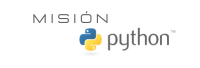

# Persistencia con Bases de datos SQLite

**¿Qué ventajas tienen las bases de datos sobre los archivos para gestionar la persistencia?**

***SQLite** es un sistema gestor de bases de datos relacionales altamente usado para gestionar la persistencia en aplicaciones de software de diferentes ámbitos (escritorio, móvil, web).  Algunas características de SQLite son las siguientes:

*   Sistema de base de datos sin servidor
*   Rápido y eficiente
*   Soporte SQL
*   Multiplataforma
*   Liviano
*   Fácil de usar
*   Integrado
*   Código abierto



**Limitaciones de SQLite**


*   Escalabilidad y acceso concurrente
*   Seguridad y funcionalidades avanzadas



En Python podemos acceder a las capacidades de SQLite a través del módulo **sqlite3**



```
import sqlite3
```

Este módulo no requiere descarga ni instalación, ya que viene instalado por defecto en Python


## Crear una conexión a la base de datos

El primer paso para gestionar la persistencia de un programa en una base de datos es crear una conexión a la base de datos.  

En Python la conexión a una base de datos SQLite es tan sencilla como la creación de un archivo de texto.  

Sintaxis:


```
objeto_conexion = sqlite3.connect("nombre_archivoBD.db")
```
La función **connect** permite conectar nuestra aplicación a una determinada base de datos SQLite que tiene la extensión .db.  

En caso de no existir la base de datos, la función connect la creará.  

La función **connect** recibe la ruta y el nombre de la base de datos con la que nos queremos conectar o crear.  Si se omite la ruta y solo se proporciona el nombre de la base de datos, esta se creará en el directorio actual.

El resultado de la función **connect** es una conexión hacia la base de datos que queda almacenada en una variable para su posterior gestión.

Miremos:

In [ ]:
import sqlite3
con = sqlite3.connect("mi_base_de_datos.db")

## Crear un objeto cursor para enviar sentencias a la BD

Las dos líneas anteriores son suficientes para conectarnos o crear una nueva base de datos SQLite.  Pero para poder trabajar con ella, necesitamos crear un objeto de tipo **cursor** a partir de la conexión creada.

Un objeto de tipo cursor proporcionará una puerta de entrada para realizar las diferentes operaciones sobre la base de datos.

Sintaxis:

```
objeto_cursor = objeto_conexion.cursor()
```





## Métodos del objeto cursor

El poder del objeto cursor está en sus métodos.  Es a través de ellos que podemos realizar operaciones reales sobre la base de datos.  

Aquí los principales métodos de un objeto cursor:
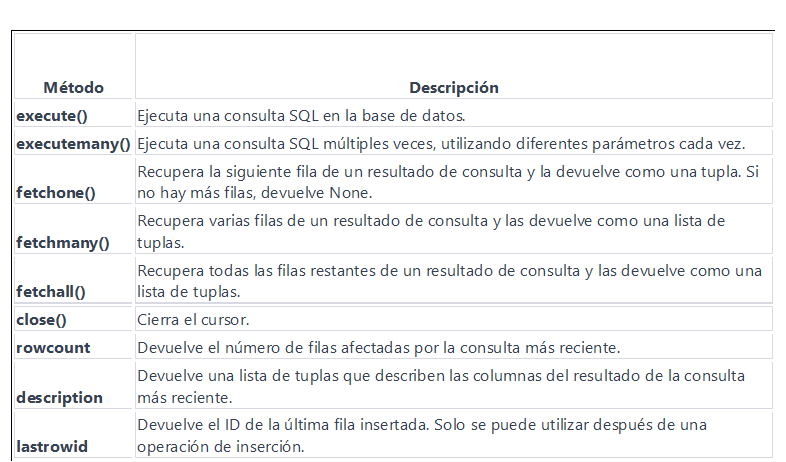



## Ejecutar sentencias SQL sobre la BD

Uno de los métodos del objeto cursor más utilizados es el método **execute()**, el cual permite enviar sentencias SQL a la base de datos para realizar alguna operación en ella.

### Crear una tabla

La sintaxis básica para crear una tabla en SQL es:


```
create table nombre_tabla (campo tipo_dato [restricción]...)
```




En la siguiente tabla vemos los tipos de datos de SQLite y su correspondencia con los tipos de datos en Python:
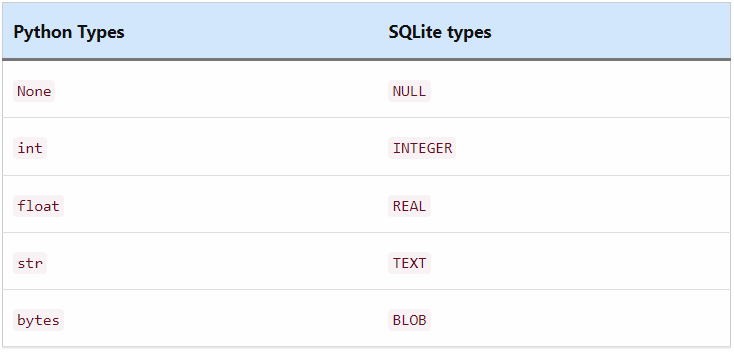

Creando una tabla básica en SQLite desde Python

In [ ]:
import sqlite3
con = sqlite3.connect("mi_bd.db")
cursor = con.cursor()
cursor.execute("CREATE TABLE IF NOT EXISTS persona (nombre TEXT, edad INTEGER)")

Las restricciones son opcionales pero de gran importancia a la hora de mantener la integridad de la información en una base de datos.  La línea 4 del programa anterior podría heber tenido algunas restricciones y verse de la siguiente manera:



```
cursor.execute("CREATE TABLE IF NOT EXISTS persona (id INTEGER PRIMARY KEY AUTOINCREMENT, nombre TEXT NOT NULL, edad INTEGER CHECK (edad > 0))")
```
*   PRIMARY KEY: Llave primaria (identifica a cada registro de manera única)
*   AUTOINCREMENT: El valor de este campo no se debe enviar pues la base de datos genera un número único autoincrementable para este campo cada vez que se agrega un nuevo registro.
*   NOT NULL: Hace que el campo sea obligatorio.
*   CHECK (edad > 0): Impide que se ingrese un número negativo como valor para el campo edad.

Para mantener nuestro programa lo más simple posible y centrarnos en lo que más nos interesa en este momento, continuaremos con la tabla sencilla que creamos en la línea 4 del código anterior:


```
cursor.execute("CREATE TABLE IF NOT EXISTS persona (nombre TEXT, edad INTEGER)")
```






Antes de continuar con otras operaciones sobre la base de datos, es de mucha utilidad contar con una herramienta que nos permita visualizar nuestra base de datos, su estructura e información.   

Una de estas herramientas de uso libre, liviana y de fácil instalación y uso es **DB browser for SQLite** la cual podemos descargar desde el siguiente repositorio:

https://github.com/sqlitebrowser/sqlitebrowser/releases/tag/v3.11.0-beta3

Descarga e instala esta herramienta, una vez instalada ábrela y carga en ella el archivo de base de datos .db generado por el programa anterior

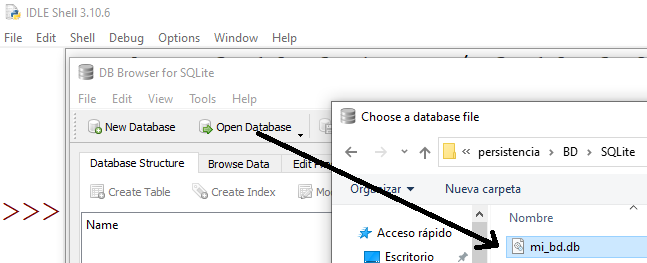

Allí podrás ver la base de datos y la estructura creada hasta el momento (tabla persona con sus campos nombre y edad)

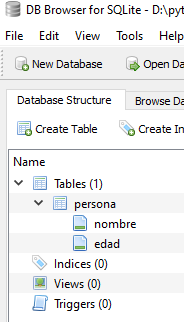

### Insertar datos

Con el mismo método que creamos la tabla podemos insertar datos en ella, modificarlos, eliminarlos y muchas más operaciones, ya que todas estas operaciones son instrucciones **SQL** que ejecutamos sobre la base de datos.  

Para profundizar un poco más sobre el lenguaje SQL puedes acceder a diferentes tutoriales en la web.  Aquí uno de ellos: https://www.w3schools.com/sql/

La sentencia para agregar registros a las tablas es **INSERT**.  Su sintaxis es la siguiente:



```
INSERT INTO tabla (campo1, campo2, campo_n)
VALUES (valor1, valor2, valor_n)
```
Vamos a insertar 3 registros en la tabla persona.  Miremos:


In [ ]:
import sqlite3
con = sqlite3.connect("mi_bd.db")
cursor = con.cursor()
cursor.execute("insert into persona values ('Juan',25)")
cursor.execute("insert into persona values ('Lina',47)")
cursor.execute("insert into persona values ('Raúl',53)")
con.commit()

Las líneas 4 a 6 realizan las inserciones de los datos en la tabla.  La línea 7 confirma la transacción.  

Con ayuda de nuestra herramienta DB browser for SQLite podemos ver los datos realmente insertados en la base de datos.

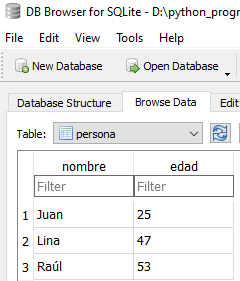

E incluso podemos ejecutar nuestras propias sentencias SQL para manipular la base de datos directamente o para comprobar la sentencia antes de escribirla en nuestro programa de Python.

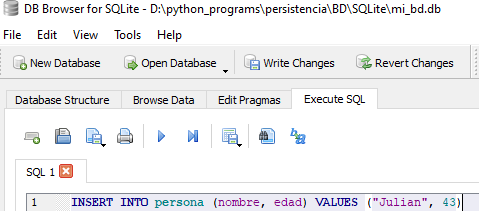

### Modificar datos

La sentencia para modificar los datos de una tabla en SQL es la siguiente:



```
UPDATE nombre_tabla SET campo = nuevo_valor
[WHERE condicion]
```


Vamos a modificar el nombre de Lina para que sea "Lina María Bedoya"  y la edad de Juan, para que quede con 26 años.

In [ ]:
import sqlite3
con = sqlite3.connect("mi_bd.db")
cursor = con.cursor()
cursor.execute("UPDATE persona SET nombre = 'Lina María Bedoya' WHERE nombre = 'Lina'")
cursor.execute("UPDATE persona SET edad = 26 WHERE nombre = 'Juan'")
con.commit()

### Eliminar datos

La sintaxis SQL para eliminar registros es la siguiente:



```
DELETE FROM nombre_tabla
[WHERE condicion]
```



Vamos a eliminar a Raúl de la tabla persona

In [ ]:
import sqlite3
con = sqlite3.connect("mi_bd.db")
cursor = con.cursor()
cursor.execute("DELETE FROM persona WHERE nombre = 'Raúl'")
con.commit()

### Consultar datos

La consulta de datos implica no solo la ejecución de una sentencia SQL sobre la base de datos, además requiere de la manipulación de los datos obtenidos.  

La sintaxis de la sentencia para la consulta de datos es la siguiente:

```
SELECT campo1, campo_n
FROM nombre_tabla
[WHERE condicion]
[otras cláusulas]
```

por ejemplo, si quisiéramos consultar todos los registros de la tabla persona, la sentencia sería así:

```
SELECT nombre, edad FROM persona
```
una manera abreviada de mostrar todos los campos es con *, miremos:

```
SELECT * FROM persona
```

Ahora, si queremos ver la información de una determinada persona o un conjunto de personas, es allí donde se usa la cláusula WHERE.  Por ejemplo:

```
SELECT nombre, edad FROM persona WHERE edad >=18
```
o
```
SELECT nombre, edad FROM persona WHERE nombre = "Juan"
```

Existen muchas otras cláusulas que son opcionales en la sentencia SELECT para obtener todo tipo de consultas, pero se salen del alcance de este curso.  

Aquí un documento que puede ayudar a profundizar sobre la sentencia SELECT https://www.cs.us.es/blogs/bd2013/files/2013/09/Consultas-SQL.pdf

Recordemos que para la consulta de datos, no solo es necesario enviar la sentencia, sino que debemos recuperar los datos en el programa y gestionarlos.  Para ello, tenemos los métodos fetch del objeto cursor

*   **fetchone()**
*   **fetchmany()**
*   **fetchall()**



Ejemplo: queremos consultar la información de todas las personas en la base de datos:

In [ ]:
import sqlite3
con = sqlite3.connect("mi_bd.db")
cursor = con.cursor()
cursor.execute ("SELECT * FROM persona")
result = cursor.fetchall()
for registro in result:
  print ("Nombre: ", registro[0], "Edad: ", registro[1])

Ejemplo: Queremos consultar la edad de Juan

In [ ]:
import sqlite3
con = sqlite3.connect("mi_bd.db")
cursor = con.cursor()
cursor.execute ("SELECT edad FROM persona WHERE nombre = 'Juan'")
result = cursor.fetchone()
print ("Edad de Juan: ", result[0])



---



## Otros métodos del objeto connection

### connection.commit()

Confirma la transacción actual (inserciones, modificaciones, eliminaciones).  Transacciones no confirmadas no serán visibles desde otras conexiones a la base de datos

### connection.rollback()

Deshace cualquier cambio en la base de datos desde el último commit realizado.  

### connection.close()

Cierra la conexión a la base de datos, importante para liberar recursos.  

### connection.total_changes

Es una propiedad que retorna el número de filas que han sido afectadas desde que la conexión a la base de datos fue abierta.



```
import sqlite3

conexion = sqlite3.connect("basededatos.db")
cursor = conexion.cursor()
cursor.execute("CREATE TABLE IF NOT EXISTS empleados(id INTEGER PRIMARY KEY, nombre TEXT)")

sentencia_sql = "INSERT INTO empleados (id, nombre) VALUES (?, ?)"

lista_parametros = [(101, "Juana"),
                    (201, "Mario"),
                    (301, "Paula"),
                    (401, "Lorenzo")]

cursor.executemany(sentencia_sql, lista_parametros)

conexion.commit()

print ("cambios totales:", conexion.total_changes)
conexion.close()

```

# Apropiación



Desarrollar una pequeña aplicación para la gestión de contactos con almacenamiento en una base de datos SQLite.  El programa debe permitir al usuario agregar, modificar, eliminar y consultar un determinado contacto. Utilizar POO para definir una clase **Contacto**.  

Asuma la información necesaria para el desarrollo de la aplicación